# Improving MICE for Data Imputation: A Methodological and Practical Exploration
# Results Exploration

## Setup

### Imports

In [18]:
# import libraries for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

### Constants

In [19]:
algorithms = ["OrderBIMICE", "FilterBIMICE", "FullBIMICE", "MICE",# "SICE", 
              "KNN"]
metrics = ["RMSE", "MSE", "MAE", "MAPE"]
iterations = [5, 10, 15]

## Test 1 - MCAR Imputations

### Load results

In [20]:
with open('framingham__MCAR__results.pkl', 'rb') as f:
    framingham_MCAR_results_dict = pickle.load(f)

with open('financial-risk__MCAR__results.pkl', 'rb') as f:
    financial_risk_MCAR_results_dict = pickle.load(f)

framingham_MCAR_results_dict, financial_risk_MCAR_results_dict

({5: {0.1: {'OrderBIMICE': {'RMSE': 4.58047792003467,
     'MSE': 36.98904402349098,
     'MAE': 1.0994796662900004,
     'MAPE': 1.0994796662900013,
     'time': 437.25},
    'FilterBIMICE': {'RMSE': 4.158741323196976,
     'MSE': 31.42982896275135,
     'MAE': 0.992131733893541,
     'MAPE': 0.3831899966505459,
     'time': 38.647},
    'FullBIMICE': {'RMSE': 4.158743354602797,
     'MSE': 31.429843358429935,
     'MAE': 0.9921322543261779,
     'MAPE': 0.38319022821984583,
     'time': 57.653999999999996},
    'MICE': {'RMSE': 4.024567309679737,
     'MSE': 30.650068946554434,
     'MAE': 0.9557552897897613,
     'MAPE': 0.9557552897897613,
     'time': 350.36},
    'KNN': {'RMSE': 4.715192523768615,
     'MSE': 39.76327059952222,
     'MAE': 1.1066039762942408,
     'MAPE': 1.1066039762942408,
     'time': 4054.354}},
   0.2: {'OrderBIMICE': {'RMSE': 6.652312165496629,
     'MSE': 74.220897323637,
     'MAE': 2.23414864961528,
     'MAPE': 2.234148649615279,
     'time': 478.719999

#### Severity levels:

In [21]:
severities = [0.1, 0.2, 0.3, 0.4]

#### Transform Structure:
The current structure of the results is as:
- Iteration
    - Severity
        - Algorithm
            - Metric
                - Results

We need to get structure as:
- Algorithm
    - Severity
        - Iteration
            - Metric
                - Result

In [22]:
framingham_MCAR_results_transformed = {}
for current_algorithm in algorithms:
    framingham_MCAR_results_transformed[current_algorithm] = {}
    for current_severity in severities:
        framingham_MCAR_results_transformed[current_algorithm][current_severity] = {}
        for current_iteration in iterations:
            framingham_MCAR_results_transformed[current_algorithm][current_severity][current_iteration] = framingham_MCAR_results_dict[current_iteration][current_severity][current_algorithm]

financial_risk_MCAR_results_transformed = {}
for current_algorithm in algorithms:
    financial_risk_MCAR_results_transformed[current_algorithm] = {}
    for current_severity in severities:
        financial_risk_MCAR_results_transformed[current_algorithm][current_severity] = {}
        for current_iteration in iterations:
            financial_risk_MCAR_results_transformed[current_algorithm][current_severity][current_iteration] = financial_risk_MCAR_results_dict[current_iteration][current_severity][current_algorithm]            

framingham_MCAR_results_transformed, financial_risk_MCAR_results_transformed

({'OrderBIMICE': {0.1: {5: {'RMSE': 4.58047792003467,
     'MSE': 36.98904402349098,
     'MAE': 1.0994796662900004,
     'MAPE': 1.0994796662900013,
     'time': 437.25},
    10: {'RMSE': 4.7130713242554645,
     'MSE': 37.689448284555255,
     'MAE': 1.0999826994502928,
     'MAPE': 1.0999826994502928,
     'time': 1033.0649999999998},
    15: {'RMSE': 4.693178546533518,
     'MSE': 40.009988831193226,
     'MAE': 1.132430720599873,
     'MAPE': 1.1324307205998734,
     'time': 443.65}},
   0.2: {5: {'RMSE': 6.652312165496629,
     'MSE': 74.220897323637,
     'MAE': 2.23414864961528,
     'MAPE': 2.234148649615279,
     'time': 478.71999999999997},
    10: {'RMSE': 7.011722234290317,
     'MSE': 84.05276393292272,
     'MAE': 2.2250333123128,
     'MAPE': 2.2250333123128025,
     'time': 635.6089999999999},
    15: {'RMSE': 6.79315343729651,
     'MSE': 81.04980775736524,
     'MAE': 2.224782503297634,
     'MAPE': 2.224782503297634,
     'time': 489.639}},
   0.3: {5: {'RMSE': 8.49

#### Per Iteration - Metric for each Algorithm (Severities aggregated)

In [23]:
framingham_aggregated_severities_df_dict = {}
for current_iteration in iterations:
    current_iteration_dict = {}
    for metric in metrics:
        current_iteration_dict[metric] = [0 for _ in algorithms]
        for current_severity in severities:
            for i, current_algorithm in enumerate(algorithms):
                current_metric_result = framingham_MCAR_results_transformed[current_algorithm][current_severity][current_iteration][metric]
                current_iteration_dict[metric][i] += current_metric_result / len(severities)
    framingham_aggregated_severities_df_dict[current_iteration] = pd.DataFrame(current_iteration_dict, index=algorithms)

financial_risk_aggregated_severities_df_dict = {}
for current_iteration in iterations:
    current_iteration_dict = {}
    for metric in metrics:
        current_iteration_dict[metric] = [0 for _ in algorithms]
        for current_severity in severities:
            for i, current_algorithm in enumerate(algorithms):
                current_metric_result = financial_risk_MCAR_results_transformed[current_algorithm][current_severity][current_iteration][metric]
                current_iteration_dict[metric][i] += current_metric_result / len(severities)
    financial_risk_aggregated_severities_df_dict[current_iteration] = pd.DataFrame(current_iteration_dict, index=algorithms)

In [30]:
columns_hierarchy = []
for dataset in ["framingham", "financial-risk"]:
    for current_iteration in iterations:
        for metric in metrics:
            columns_hierarchy.append((dataset, f"{current_iteration} iterations", metric))
grouped_by_columns = pd.MultiIndex.from_tuples(columns_hierarchy)
data = pd.concat(list(framingham_aggregated_severities_df_dict.values()) + list(financial_risk_aggregated_severities_df_dict.values()), axis=1) #, keys=iterations, names=["Iteration", "Metric"]
data.columns = grouped_by_columns
data.to_csv("MCAR_aggregated_severities_results.csv")
data

framingham                                                \
             5 iterations                                 10 iterations   
                     RMSE         MSE       MAE      MAPE          RMSE   
OrderBIMICE      7.330276   98.256238  2.794533  2.794533      7.322100   
FilterBIMICE     6.820518   87.053438  2.582323  0.988565      6.806602   
FullBIMICE       6.820525   87.051985  2.582522  0.988635      6.806601   
MICE             6.645435   85.502918  2.505383  2.505383      6.615954   
KNN              7.952745  116.493462  3.059005  3.059005      7.985171   

                                                                        ...  \
                                             15 iterations              ...   
                     MSE       MAE      MAPE          RMSE         MSE  ...   
OrderBIMICE    98.018441  2.795350  2.795350      7.325592   97.783400  ...   
FilterBIMICE   86.913799  2.591722  0.996632      6.827857   86.669431  ...   
FullBIMICE     86.913792  2.591725  0.996632      6.827857   86.669427  ...   
MICE           85.272649  2.508709  2.508709      6.655065   85.175905  ...   
KNN           113.356761  3.039692  3.039692      7.939080  113.256714  ...   

             financial-risk                                           \
               5 iterations              10 iterations                 
                        MAE         MAPE          RMSE           MSE   
OrderBIMICE     3765.426937  3765.426937   8472.882334  2.630495e+08   
FilterBIMICE    3767.065895  2887.248775   8476.851967  2.632942e+08   
FullBIMICE      3767.079267  2887.260704   8476.852295  2.632942e+08   
MICE            3770.053986  3770.053986   8483.313506  2.637551e+08   
KNN             4085.878344  4085.878344   9416.174124  3.205611e+08   

                                                                    \
                                       15 iterations                 
                      MAE         MAPE          RMSE           MSE   
OrderBIMICE   3758.854454  3758.854454   8534.378636  2.683125e+08   
FilterBIMICE  3759.709265  2870.675958   8538.516506  2.686748e+08   
FullBIMICE    3759.709411  2870.676053   8538.516511  2.686748e+08   
MICE          3761.548170  3761.548170   8548.244455  2.694344e+08   
KNN           4044.515978  4044.515978   9916.388945  3.641612e+08   

                                        
                                        
                      MAE         MAPE  
OrderBIMICE   3798.840798  3798.840798  
FilterBIMICE  3798.839265  2927.607426  
FullBIMICE    3798.839266  2927.607428  
MICE          3802.319329  3802.319329  
KNN           4213.933153  4213.933153  

[5 rows x 24 columns]

#### Per Iteration - RMSE for each Algorithm Over Different Severities

In [48]:
metric = "MSE"
framingham_MSE_df_dict = {}
for current_iteration in iterations:
    framingham_MSE_df_dict[current_iteration] = {}
    for algorithm in algorithms:
        framingham_MSE_df_dict[current_iteration][algorithm] = [framingham_MCAR_results_transformed[algorithm][current_severity][current_iteration][metric] for current_severity in severities]

financial_risk_MSE_df_dict = {}
for current_iteration in iterations:
    financial_risk_MSE_df_dict[current_iteration] = {}
    for algorithm in algorithms:
        financial_risk_MSE_df_dict[current_iteration][algorithm] = [financial_risk_MCAR_results_transformed[algorithm][current_severity][current_iteration][metric] for current_severity in severities]

metric = "MAPE"        
framingham_MAPE_df_dict = {}
for current_iteration in iterations:
    framingham_MAPE_df_dict[current_iteration] = {}
    for algorithm in algorithms:
        framingham_MAPE_df_dict[current_iteration][algorithm] = [framingham_MCAR_results_transformed[algorithm][current_severity][current_iteration][metric] for current_severity in severities]

financial_risk_MAPE_df_dict = {}
for current_iteration in iterations:
    financial_risk_MAPE_df_dict[current_iteration] = {}
    for algorithm in algorithms:
        financial_risk_MAPE_df_dict[current_iteration][algorithm] = [financial_risk_MCAR_results_transformed[algorithm][current_severity][current_iteration][metric] for current_severity in severities]

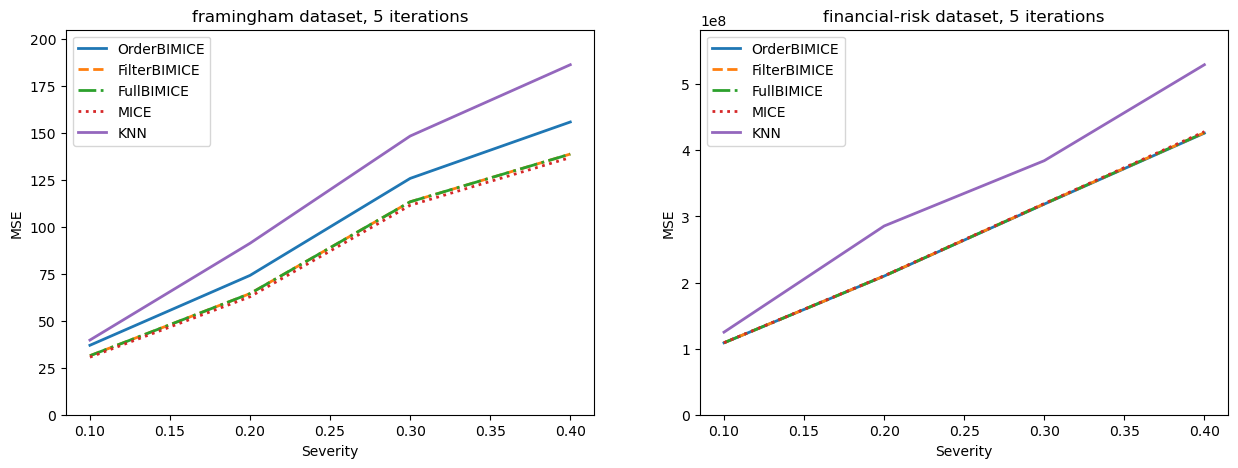

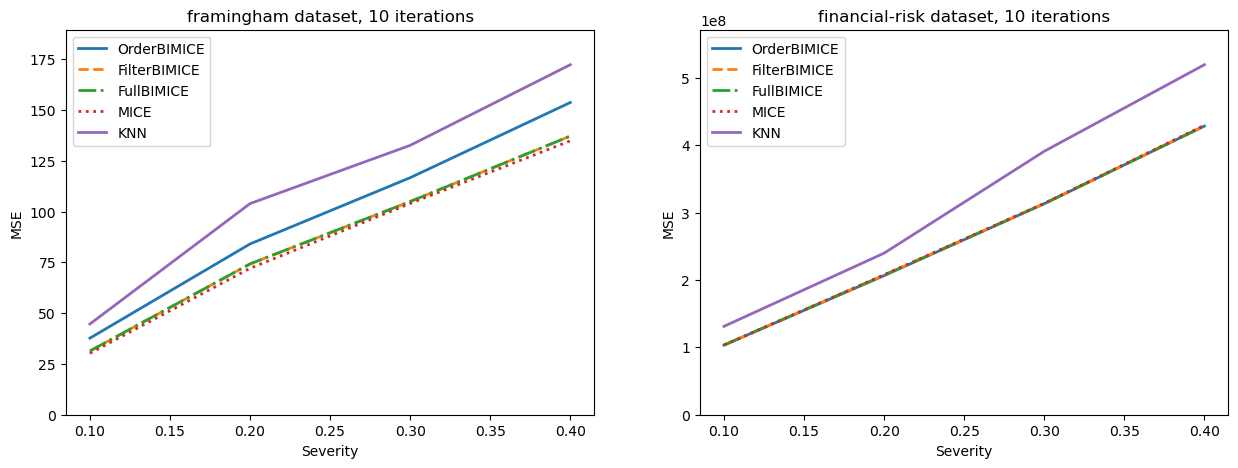

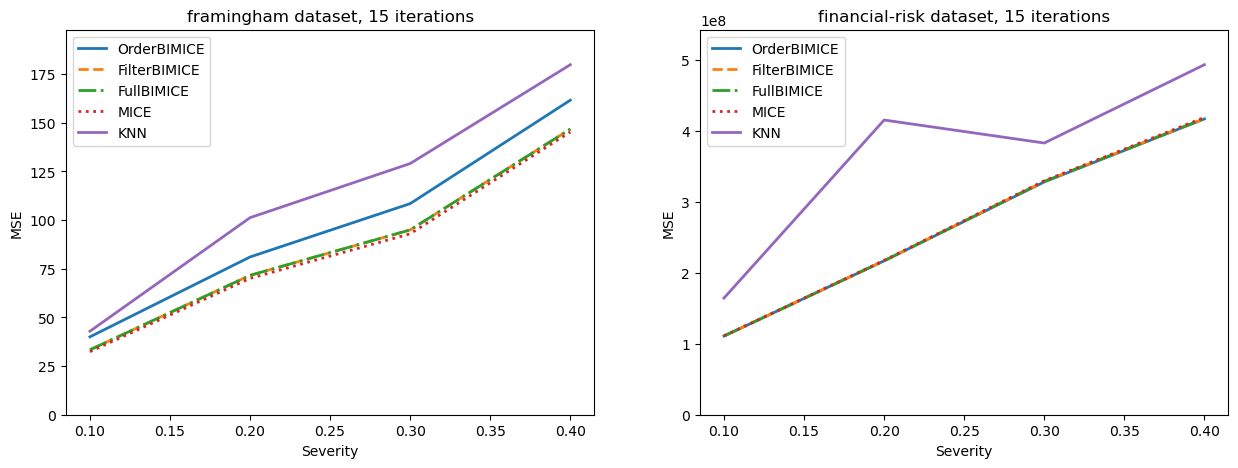

In [47]:
line_styles = ['-', '--', '-.', ':']

for current_iteration in iterations:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for i, (dataset, MSE_df_dict) in enumerate([("framingham", framingham_MSE_df_dict), ("financial-risk", financial_risk_MSE_df_dict)]):
        ax = axs[i]
        for j, algorithm in enumerate(algorithms):
            ax.plot(severities, MSE_df_dict[current_iteration][algorithm], label=algorithm, linewidth=2, linestyle=line_styles[j % len(line_styles)])  # Increase line width and set line style
        ax.set_title(f"{dataset} dataset, {current_iteration} iterations")
        ax.set_xlabel("Severity")
        ax.set_ylabel("MSE")
        ax.legend()
        ax.set_ylim([0, max(max(MSE_df_dict[current_iteration][alg]) for alg in algorithms) * 1.1])  # Increase scale
    plt.show()

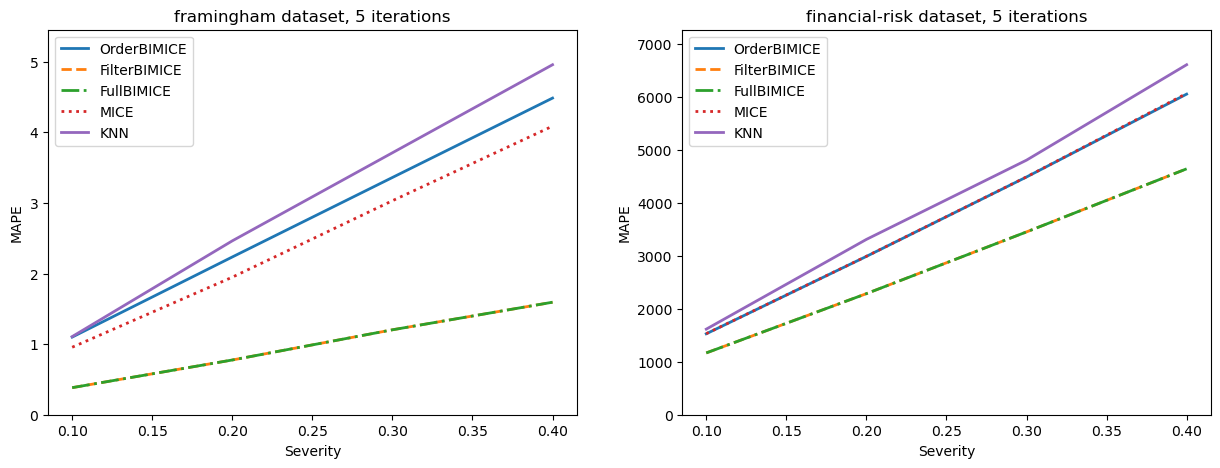

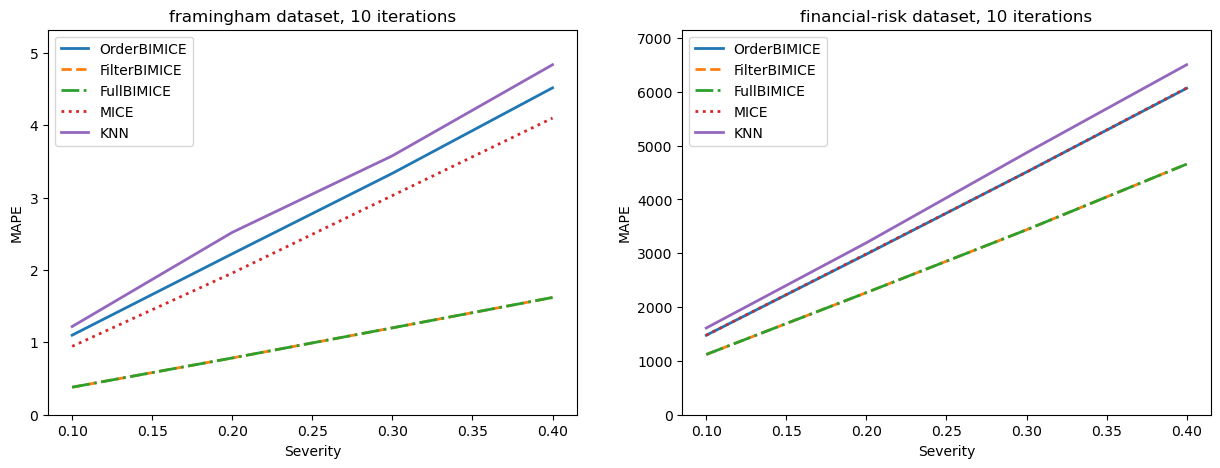

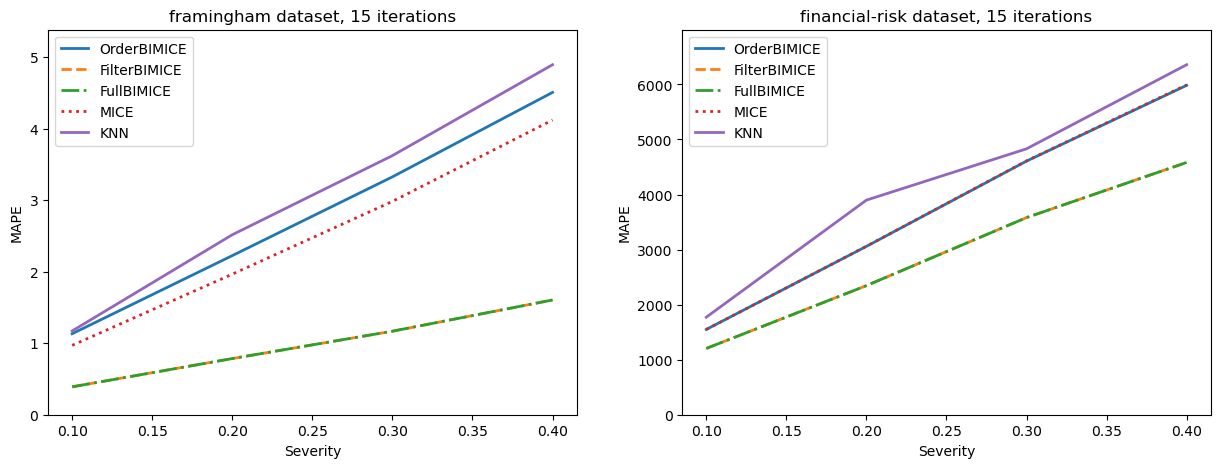

In [51]:
line_styles = ['-', '--', '-.', ':']

for current_iteration in iterations:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for i, (dataset, MAPE_df_dict) in enumerate([("framingham", framingham_MAPE_df_dict), ("financial-risk", financial_risk_MAPE_df_dict)]):
        ax = axs[i]
        for j, algorithm in enumerate(algorithms):
            ax.plot(severities, MAPE_df_dict[current_iteration][algorithm], label=algorithm, linewidth=2, linestyle=line_styles[j % len(line_styles)])  # Increase line width and set line style
        ax.set_title(f"{dataset} dataset, {current_iteration} iterations")
        ax.set_xlabel("Severity")
        ax.set_ylabel("MAPE")
        ax.legend()
        ax.set_ylim([0, max(max(MAPE_df_dict[current_iteration][alg]) for alg in algorithms) * 1.1])  # Increase scale
    plt.show()